# 快速入门：使用 REST API 开始使用 Gemini
如果您想快速试用Gemini API，可以使用curl命令调用REST API中的方法。本教程中的示例显示了对每个 API 方法的调用。

Colab 使用 Python 代码设置环境变量并显示图像，但您不需要 Colab 来使用 REST API。只要您按照下一节中所述设置了 API_KEY，您就应该能够在 Colab 之外运行所有curl 示例，而无需进行修改。

## 设置您的 API 密钥
要使用 Gemini API，您需要一个 API 密钥。如果您还没有密钥，请在 Google AI Studio 中创建密钥。
```{button}
Get an API key
```
在 Colab 中，将密钥添加到左侧面板“🔑”下的秘密管理器中。将其命名为 API_KEY。然后，您可以将其添加为环境变量以在curl 调用中传递密钥。  
在终端中，您只需运行 API_KEY="Your API Key" 即可。

In [16]:
import os
# from google.colab import userdata

os.environ['API_KEY'] = "YOUR-API-KEY"


## Gemini 和基于内容的 API
### 纯文本输入
使用`generateContent`方法根据给定的输入消息从模型生成响应。如果输入仅包含文本，请使用`gemini-pro`模型。

In [7]:
! curl https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?key=YOUR-API-KEY \
    -H 'Content-Type: application/json' \
    -X POST \
    -d '{"contents": [{"parts":[{"text": "Write a story about a magic backpack."}]}]}' 2> /dev/null


{
  "candidates": [
    {
      "content": {
        "parts": [
          {
            "text": "Once upon a time, in a vibrant town nestled amidst rolling hills, a young girl named Lily stumbled upon a magical backpack in a quaint antique shop. Intrigued by its intricate carvings and vibrant colors, she couldn't resist bringing it home.\n\nAs Lily eagerly explored her new treasure, she discovered it was no ordinary backpack. Its interior was a vast and ever-changing realm, filled with secrets waiting to be unveiled. Each time she reached inside, she encountered different landscapes and extraordinary beings.\n\nOne day, Lily found herself in a lush forest where she encountered a talking squirrel who revealed the backpack's true powers. He explained that the backpack was a portal to different dimensions and that Lily had the ability to harness its magic and travel to different worlds.\n\nWith a mix of excitement and trepidation, Lily embarked on her first interdimensional journey. She f

## 文本和图像输入
如果输入同时包含文本和图像，请使用gemini-pro-vision 模型。以下代码片段可帮助您构建请求并将其发送到 REST API。

In [10]:
! curl -o image_scones.jpg https://storage.googleapis.com/generativeai-downloads/images/scones.jpg


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  385k  100  385k    0     0   158k      0  0:00:02  0:00:02 --:--:--  158k


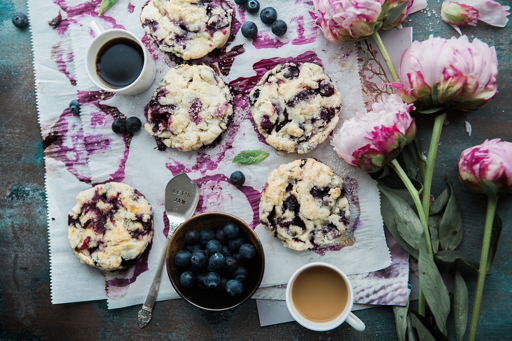

In [11]:
import PIL.Image

img = PIL.Image.open("image_scones.jpg")
img.resize((512, int(img.height*512/img.width)))


```shell
echo '{
  "contents":[
    {
      "parts":[
        {"text": "What is this picture?"},
        {
          "inline_data": {
            "mime_type":"image/jpeg",
            "data": "'$(base64 -w0 image_scones.jpg)'"
          }
        }
      ]
    }
  ]
}' > request.json

```

In [14]:
%%bash
echo '{
  "contents":[
    {
      "parts":[
        {"text": "What is this picture?"},
        {
          "inline_data": {
            "mime_type":"image/jpeg",
            "data": "'$(base64 -w0 image.jpg)'"
          }
        }
      ]
    }
  ]
}' > request.json

In [17]:
%%bash
curl https://generativelanguage.googleapis.com/v1beta/models/gemini-pro-vision:generateContent?key=${API_KEY} \
        -H 'Content-Type: application/json' \
        -d @request.json 2> /dev/null | grep "text"

            "text": " This is a picture of two glass containers with food. Each container has white rice, orange bell peppers, broccoli, and chicken. The chicken appears to be covered in some type of sauce."


## 多轮对话（聊天）
使用 Gemini，您可以跨多个回合建立自由形式的对话。

In [18]:
%%bash
curl https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?key=$API_KEY \
    -H 'Content-Type: application/json' \
    -X POST \
    -d '{
      "contents": [
        {"role":"user",
         "parts":[{
           "text": "Write the first line of a story about a magic backpack."}]},
        {"role": "model",
         "parts":[{
           "text": "In the bustling city of Meadow brook, lived a young girl named Sophie. She was a bright and curious soul with an imaginative mind."}]},
        {"role": "user",
         "parts":[{
           "text": "Can you set it in a quiet village in 1600s France?"}]},
      ]
    }' 2> /dev/null | grep "text"


            "text": "In the quaint village of Verdigny, nestled amidst the rolling hills of 17th-century France, lived a young girl named Estelle. With her rosy cheeks and sparkling eyes, she was known for her insatiable curiosity and adventurous spirit."


```{tip}
注意：gemini-pro-vision 模型（用于文本和图像输入）尚未针对多轮对话进行优化。确保在聊天用例中使用 Gemini-pro 和纯文本输入。
```

## 模型配置
您发送到模型的每个提示都包含控制模型如何生成响应的参数值。该模型可以针对不同的参数值生成不同的结果。了解有关[模型参数](model_parameters)的更多信息。

此外，您还可以使用安全设置来调整获得可能被认为有害的响应的可能性。默认情况下，安全设置会阻止所有维度上具有中度和/或高概率不安全内容的内容。了解有关[安全设置](safety_setting_gemini.ipynb)的更多信息。

以下示例指定`generateContent`方法的所有参数的值。

In [19]:
%%bash
curl https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?key=$API_KEY \
    -H 'Content-Type: application/json' \
    -X POST \
    -d '{
        "contents": [{
            "parts":[
                {"text": "Write a story about a magic backpack."}
            ]
        }],
        "safetySettings": [
            {
                "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
                "threshold": "BLOCK_ONLY_HIGH"
            }
        ],
        "generationConfig": {
            "stopSequences": [
                "Title"
            ],
            "temperature": 1.0,
            "maxOutputTokens": 800,
            "topP": 0.8,
            "topK": 10
        }
    }'  2> /dev/null | grep "text"


            "text": "In a bustling city where skyscrapers pierced the sky, a young boy named Ethan stumbled upon a secret that would change his life forever. As he walked home from school one day, he noticed a worn-out backpack lying forgotten on a park bench. Curiosity sparked within him, so he cautiously picked it up and peered inside. To his astonishment, it was filled with an assortment of peculiar items that seemed to possess an extraordinary aura.\n\nEthan's eyes widened as he pulled out a glowing orb that shimmered like a distant star. A gentle warmth emanated from it, enveloping his hand in a comforting embrace. As he turned it over, he discovered intricate symbols etched into its surface, pulsating with a mysterious energy.\n\nNext, he found a silver locket that whispered forgotten tales when opened. Each delicate page held images of faraway lands, mythical creatures, and forgotten civilizations. The locket seemed to possess a memory of its own, transporting Ethan to realms be

## 流式生成内容
默认情况下，模型在完成整个生成过程后返回响应。您可以通过不等待整个结果，而是使用流处理部分结果来实现更快的交互。

In [20]:
%%bash
curl https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:streamGenerateContent?key=${API_KEY} \
        -H 'Content-Type: application/json' \
        --no-buffer \
        -d '{ "contents":[{"parts":[{"text": "Write long a story about a magic backpack."}]}]}' \
        2> /dev/null | grep "text"


            "text": "Once upon a time, in a world where magic was hidden within the folds of"
            "text": " reality, there lived a young and imaginative girl named Luna. Her eyes sparkled with dreams and her mind raced with stories, always searching for adventure.\n\nOne"
            "text": " day, as Luna set off on her daily journey to school, she stumbled upon a hidden antique shop tucked away in the corner of a bustling street. Its windows were filled with an array of forgotten treasures, and Luna couldn't resist stepping inside.\n\nAmong the shelves lined with curious artifacts and trinkets, Luna'"
            "text": "s eyes caught sight of an old, worn-out backpack resting in a dusty corner. Its leather was cracked and weathered, and its straps hung loose and limp. Yet, there was something about the backpack that drew Luna in.\n\nAs she reached out to touch it, the air around Luna seemed to shimmer. To her astonishment, the backpack suddenly came to life, its faded color

```{tip}
注意：您将需要一个流式 json 解析器来处理此问题，而无需先读取整个流。
```

## 计数代币
使用长提示时，在将任何内容发送到模型之前计算令牌可能会很有用。

In [22]:
%%bash
curl https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:countTokens?key=$API_KEY \
    -H 'Content-Type: application/json' \
    -X POST \
    -d '{
      "contents": [{
        "parts":[{
          "text": "Write a story about a magic backpack."}]}]}' 2> /dev/null



{
  "totalTokens": 8
}


## 嵌入
嵌入是一种用于将信息表示为数组中的浮点数列表的技术。使用 Gemini，您可以以矢量化形式表示文本（单词、句子和文本块），从而更轻松地比较和对比嵌入。例如，共享相似主题或情感的两个文本应该具有相似的嵌入，这可以通过余弦相似度等数学比较技术来识别。

将`embedding-001`模型与`embedContents`或`batchEmbedContents`结合使用：

In [23]:
%%bash
curl https://generativelanguage.googleapis.com/v1beta/models/embedding-001:embedContent?key=$API_KEY \
    -H 'Content-Type: application/json' \
    -X POST \
    -d '{
        "model": "models/embedding-001",
        "content": {
        "parts":[{
          "text": "Write a story about a magic backpack."}]} }' 2> /dev/null | head


{
  "embedding": {
    "values": [
      0.008624583,
      -0.030451821,
      -0.042496547,
      -0.029230341,
      0.05486475,
      0.006694871,
      0.004025645,


In [24]:
%%bash
curl https://generativelanguage.googleapis.com/v1beta/models/embedding-001:batchEmbedContents?key=$API_KEY \
    -H 'Content-Type: application/json' \
    -X POST \
    -d '{
      "requests": [{
        "model": "models/embedding-001",
        "content": {
        "parts":[{
          "text": "Write a story about a magic backpack."}]} }]}' 2> /dev/null | head


{
  "embeddings": [
    {
      "values": [
        0.008624583,
        -0.030451821,
        -0.042496547,
        -0.029230341,
        0.05486475,
        0.006694871,


## 模型信息
### 获取模型信息
如果您获取模型的 URL，API 将使用 get 方法返回有关该模型的信息，例如版本、显示名称、输入令牌限制等。

In [25]:
%%bash
curl https://generativelanguage.googleapis.com/v1beta/models/gemini-pro?key=$API_KEY


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   345    0   345    0     0    406      0 --:--:-- --:--:-- --:--:--   405


{
  "name": "models/gemini-pro",
  "version": "001",
  "displayName": "Gemini Pro",
  "description": "The best model for scaling across a wide range of tasks",
  "inputTokenLimit": 30720,
  "outputTokenLimit": 2048,
  "supportedGenerationMethods": [
    "generateContent",
    "countTokens"
  ],
  "temperature": 0.9,
  "topP": 1,
  "topK": 1
}


## 罗列模型
如果您获取模型目录，它将使用 list 方法列出通过 API 可用的所有模型，包括 Gemini 和 PaLM 系列模型。


In [27]:
%%bash
curl https://generativelanguage.googleapis.com/v1beta/models?key=$API_KEY > response_list_models.json



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2938    0  2938    0     0   4087      0 --:--:-- --:--:-- --:--:--  4086


In [28]:
%%bash
cat response_list_models.json

{
  "models": [
    {
      "name": "models/chat-bison-001",
      "version": "001",
      "displayName": "PaLM 2 Chat (Legacy)",
      "description": "A legacy text-only model optimized for chat conversations",
      "inputTokenLimit": 4096,
      "outputTokenLimit": 1024,
      "supportedGenerationMethods": [
        "generateMessage",
        "countMessageTokens"
      ],
      "temperature": 0.25,
      "topP": 0.95,
      "topK": 40
    },
    {
      "name": "models/text-bison-001",
      "version": "001",
      "displayName": "PaLM 2 (Legacy)",
      "description": "A legacy model that understands text and generates text as an output",
      "inputTokenLimit": 8196,
      "outputTokenLimit": 1024,
      "supportedGenerationMethods": [
        "generateText",
        "countTextTokens",
        "createTunedTextModel"
      ],
      "temperature": 0.7,
      "topP": 0.95,
      "topK": 40
    },
    {
      "name": "models/embedding-gecko-001",
      "version": "001",
      "displa